# Metody Obliczeniowe w Nauce i Technice Laboratorium 1
## Arytmetyka komputerowa
### Paweł Gorgolewski

## 1. Sumowanie liczb pojedynczej precyzji

### 1.1. Program iteracyjnie zliczający sumę tablicy

In [1]:
from numpy import float32, float64, linspace, arange
import matplotlib.pyplot as plt
import time

In [2]:
v = 0.53125
N = 10 ** 7
numbers = [float32(v) for _ in range(N)]
precise_sum = N*v

In [3]:
def iterative_sum(numbers):
    result = float32(0.0)
    for num in numbers:
        result += num

    return result

iterative = iterative_sum(numbers)

print(f"Iterative sum is {iterative}")
print(f"Precise sum is {precise_sum}")

Iterative sum is 5030840.5
Precise sum is 5312500.0


Suma algorytmu znacząco różni się wartości prawdziwej. Łatwo wyciągnąć z tego wnioski - taki algorytm nie jest poprawny

### 1.2. Błąd względny i bezwględny algorytmu iteracyjnego

In [4]:
def absolute_error(counted, precise):
    return abs(precise - counted)

def relative_error(counted, precise):
    return absolute_error(counted, precise) / precise

In [5]:
print(f"Absolute error of iterative sum: {absolute_error(iterative, precise_sum)}")
print(f"Relative error of iterative sum: {relative_error(iterative, precise_sum)}")

Absolute error of iterative sum: 281659.5
Relative error of iterative sum: 0.05301825882352941


Błąd względny algorytmu dla podanego przykładu wynosi aż 5,3%! Potwierdza to tylko, że algorytm jest niepoprawny. Błąd algorytmu jest tak duży, ponieważ dochodzi do wielu 'ucięć' podczas dodawania. Zauważmy, że w pewnym momencie, suma staje się już na tyle duża, że dodanie po raz kolejny tak małej liczby jak 0.53125, spowoduje przesunięcie i niedokładność

### 1.3. Wykres błądu względnego od ilości iteracji algorytmu

In [6]:
def relative_error_over_time_plot(numbers, step=25000):
    relative_error_in_steps = [float32(0.0)]
    result = float32(0.0)
    for i in range(len(numbers)):
        result += numbers[i]
        if (i + 1) % step == 0:
            tmp_error = relative_error(result, v*(i+1))
            relative_error_in_steps.append(tmp_error)

    steps = [x * step for x in range(0, N // step + 1)]
    plt.plot(steps, relative_error_in_steps)
    plt.xlabel('STEPS')
    plt.ylabel('ERROR')
    plt.title("Relative error over iterations")
    plt.show()

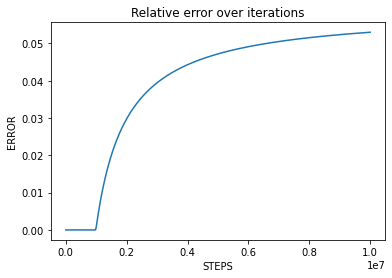

In [7]:
relative_error_over_time_plot(numbers)

Wykres potwierdza wcześniejszą iterpretację błędu. Początkowo błąd nie występuje gdyż dodawane do siebie liczby są tego samego rzędu. W miarę zwiększania się sumy w algorytmie, błąd pojawia się i rośnie.

### 1.4. i 1.5. Rekurencyjny algorytm sumowania oraz błąd względny i bezwględny

In [8]:
def recursive_sum(numbers):
    if len(numbers) > 2:
        return recursive_sum(numbers[:len(numbers) // 2]) + recursive_sum(numbers[len(numbers) // 2:])
    else:
        return numbers[0] if len(numbers) == 1 else numbers[0] + numbers[1]

recursive = recursive_sum(numbers)

print(f"Recursive sum is {recursive}")
print(f"Precise sum is {precise_sum}")

Recursive sum is 5312500.0
Precise sum is 5312500.0


In [9]:
print(f"Absolute error of recursive sum: {absolute_error(recursive, precise_sum)}")
print(f"Relative error of recursive sum: {relative_error(recursive, precise_sum)}")

Absolute error of recursive sum: 0.0
Relative error of recursive sum: 0.0


Rekurencyjny algorytm sortowania jest zdecydowanie lepszy niż iteracyjny. Dla takich samych wartości, na których był testowany algorytm iteracyjny, zwraca błąd równy 0! Algorytm zawsze dodaje do siebie dwie takie same liczby, przez co nie dochodzi do zaokrąglania.

### 1.6. Czas działania algorytm iteracyjnego i rekurencyjnego

In [10]:
iterative_start = time.time()
iterative_sum(numbers)
iterative_time = time.time() - iterative_start

recursive_start = time.time()
recursive_sum(numbers)
recursive_time = time.time() - recursive_start

print(f"Iterative sum takes {iterative_time} seconds")
print(f"Recursive sum takes {recursive_time} seconds")

Iterative sum takes 1.456228494644165 seconds
Recursive sum takes 7.903707265853882 seconds


Czas sumowania algorytmu rekurencyjnego jest o wiele dłuższy niż iteracyjnego. W moim przypadku jest on dłuższy około 6 razy.

### 1.7 Przykład niepoprawnego wyniku algorytmu rekurencyjnego

In [11]:
difficult_example = [float32(0.81111) for _ in range(N)]
recursive = recursive_sum(difficult_example)
precise_sum = 0.81111*N

print(f"Recursive sum is {recursive}")
print(f"Precise sum is {precise_sum}")
print(f"Absolute error is: {absolute_error(recursive, precise_sum)}")
print(f"Relative error is: {relative_error(recursive, precise_sum)}")

Recursive sum is 8111101.0
Precise sum is 8111100.0
Absolute error is: 1.0
Relative error is: 1.2328784012032893e-07


Niestety algorytm rekurencyjny również nie jest poprawnym algorytmem sumowania. Oprócz pokazanego wyżej przykładu, algorytm ten zwróci niepoprawny wynik dla np. tablicy posortowaniej rosnąco. Różnice pomiędzy dodawanymi liczbami, podobnie jak algorytm iteracyjny, sprawią, że algorytm będzie zwracał niepoprawny wynik.

## 2. Algorytm Kahana

### 2.1. Algorytm Kahana, błąd względny i bezwględny

In [12]:
def kahan_sum(numbers):
    result = float32(0)
    err = float32(0)
    for num in numbers:
        y = num - err
        temp = result + y
        err = (temp - result) - y
        result = temp

    result = result - err
    return result

In [13]:
kahan = kahan_sum(difficult_example)

print(f"Kahan sum is {kahan}")
print(f"Precise sum is {precise_sum}")
print(f"Absolute error is: {absolute_error(kahan, precise_sum)}")
print(f"Relative error is: {relative_error(kahan, precise_sum)}")

Kahan sum is 8111100.0
Precise sum is 8111100.0
Absolute error is: 0.0
Relative error is: 0.0


Algorytm Kahana jest zdecydowanie lepszym algorytmem sumowania niż poprzednie dwa. Potwierdza to fakt, iż zwraca poprawny wynik dla przykładu w którym niepoprawny był algorytm rekurencyjny.

### 2.2. Własności algorytmu Kahana

Algorytm zawdzięcza swoją precyzję zmiennej err. Przechowuje ona błąd, jaki powstał w danej iteracji i używa jej w nastepnej do poprawienia wyniku. Dzięki temu sumowanie jest cały czas naprawianie i ostatecznie nie dostajemy błędu.

### 2.3 Czas działania algoytmu Kahana i rekurencyjnego

In [14]:
recursive_start = time.time()
recursive_sum(difficult_example)
recursive_time = time.time() - recursive_start

kahan_start = time.time()
kahan_sum(difficult_example)
kahan_time = time.time() - kahan_start

print(f"Recursive sum takes {recursive_time} seconds")
print(f"Kahan sum takes {kahan_time} seconds")

Recursive sum takes 7.391780138015747 seconds
Kahan sum takes 6.874496221542358 seconds


W moim przypadku algorytm Kahana jest nieco szybszy od rekurencyjnego. Nie mniej jednak, oba algorytmy wykonują się w podobnym czasie - na innej maszynie, algorytm rekurencyjny mógłby okazać się szybszy

### 2.4 Dodatkowy podpunkt - dziwny przypadek algorytmu Kahana

Natchniony odkryciem jednej ze studentek, poczyniłem starania i znalazłem przykład w którym nastepuje błąd w algorytmie Kahana (była to metoda prób i błędów, możliwe że jest to dokładnie taki sam przykład co u odkrywczyni)

In [15]:
strange_example = [float32(0.652148) for _ in range(N)]
precise_sum_of_strange_example = 0.652148 * N
strange_kahan_sum = kahan_sum(strange_example)

print(f"Kahan sum is {strange_kahan_sum}")
print(f"Precise sum is {precise_sum_of_strange_example}")
print(f"Absolute error is: {absolute_error(strange_kahan_sum, precise_sum_of_strange_example)}")
print(f"Relative error is: {relative_error(strange_kahan_sum, precise_sum_of_strange_example)}")


Kahan sum is 6521480.0
Precise sum is 6521479.999999999
Absolute error is: 9.313225746154785e-10
Relative error is: 1.4280846903087622e-16


Błąd który tu wystąpił jest minimalny, lecz rezultat zdecydowanie niespodziewany - algorytm Kahana uznaje się jako poprawny algorytm sumowania. Prawdopodobnie wystąpił on z powodu specyfiki języka - Python dużo operacji wykonuje 'pod spodem' i mogło to wpłynąć na ten co prawda minimalny, ale jednak błąd.

## 3. Sumy częściowe

In [16]:
def dzeta_forward(n, s, float_type=float32):
    """Dzeta forward"""
    result = float_type(0.0)
    for k in range(1, n+1):
        result += float_type(1 / float_type(k**s))
    return result


def dzeta_backward(n, s, float_type=float32):
    """Dzeta backward"""
    result = float_type(0.0)
    for k in range(n, 0, -1):
        result += float_type(1 / float_type(k**s))
    return result


def eta_forward(n, s, float_type=float32):
    """Eta forward"""
    result = float_type(0.0)
    for k in range(1, n+1):
        result += float_type(float_type((-1) ** float_type(k - 1)) / float_type(k**s))
    return result


def eta_backward(n, s, float_type=float32):
    """Eta backward"""
    result = float_type(0.0)
    for k in range(n, 0, -1):
        result += float_type(float_type((-1) ** float_type(k - 1)) / float_type(k**s))

    return result

In [17]:
def check_funcs_for_different_values(forward_func, backward_func):
    N = [50, 100, 200, 500, 1000]
    S = [2, 3.6667, 5, 7.2, 10]

    for i in range(len(N)):
        n = N[i]
        s = S[i]

        float32_result_forward = forward_func(n,s)
        float64_result_forward = forward_func(n,s, float64)

        float32_result_backward = backward_func(n,s)
        float64_result_backward = backward_func(n,s, float64)

        float_diff_forward = abs(float32_result_forward-float64_result_forward)
        float_diff_backward = abs(float32_result_backward-float64_result_backward)

        front_back_32_diff = abs(float32_result_backward-float32_result_forward)
        front_back_64_diff = abs(float64_result_backward-float64_result_forward)


        print(f"n = {n}, s = {s}")
        print(f"{forward_func.__doc__} float32: {float32_result_forward}, {backward_func.__doc__} float32: {float32_result_backward}")
        print(f"{forward_func.__doc__} float64: {float64_result_forward}, {backward_func.__doc__} float64: {float64_result_backward}")

        print(f"(float32 and float64 difference) Forward: {float_diff_forward}, Backward: {float_diff_backward}")
        print(f"(forward and backward difference) float32: {front_back_32_diff}, float64: {front_back_64_diff}\n")

Sprawdzenie dla funkcji Eta:

In [18]:
check_funcs_for_different_values(eta_forward, eta_backward)

n = 50, s = 2
Eta forward float32: 0.8222709894180298, Eta backward float32: 0.8222710490226746
Eta forward float64: 0.8222710318260295, Eta backward float64: 0.8222710318260289
(float32 and float64 difference) Forward: 4.240799966748199e-08, Backward: 1.719664566302015e-08
(forward and backward difference) float32: 5.960464477539063e-08, float64: 5.551115123125783e-16

n = 100, s = 3.6667
Eta forward float32: 0.9346932768821716, Eta backward float32: 0.9346933364868164
Eta forward float64: 0.9346933211400662, Eta backward float64: 0.934693321140067
(float32 and float64 difference) Forward: 4.425789457140894e-08, Backward: 1.5346749426825568e-08
(forward and backward difference) float32: 5.960464477539063e-08, float64: 7.771561172376096e-16

n = 200, s = 5
Eta forward float32: 0.9721198081970215, Eta backward float32: 0.9721197485923767
Eta forward float64: 0.972119770445367, Eta backward float64: 0.9721197704453663
(float32 and float64 difference) Forward: 3.775165446917583e-08, Backw

Sprawdzenie dla funkcji dzeta:

In [19]:
check_funcs_for_different_values(dzeta_forward, dzeta_backward)

n = 50, s = 2
Dzeta forward float32: 1.6251329183578491, Dzeta backward float32: 1.62513267993927
Dzeta forward float64: 1.625132733621529, Dzeta backward float64: 1.6251327336215293
(float32 and float64 difference) Forward: 1.8473632001914098e-07, Backward: 5.368225930446613e-08
(forward and backward difference) float32: 2.384185791015625e-07, float64: 2.220446049250313e-16

n = 100, s = 3.6667
Dzeta forward float32: 1.1094086170196533, Dzeta backward float32: 1.1094088554382324
Dzeta forward float64: 1.1094087973421474, Dzeta backward float64: 1.1094087973421476
(float32 and float64 difference) Forward: 1.8032249404775769e-07, Backward: 5.809608483176021e-08
(forward and backward difference) float32: 2.384185791015625e-07, float64: 2.220446049250313e-16

n = 200, s = 5
Dzeta forward float32: 1.0369274616241455, Dzeta backward float32: 1.0369277000427246
Dzeta forward float64: 1.0369277549886775, Dzeta backward float64: 1.036927754988676
(float32 and float64 difference) Forward: 2.933

Wnioski:
* różnica dla sumowania na typach 32 oraz 64 bitowych jest niewielka - liczby różnią się dopiero na ostatnich cyfrach po przecinku
* sumowanie w przód i wstecz daje różne wyniki
* Funkcja dzeta Riemanna tworzy coraz mniejsze wartości, zatem warto sumować od tyłu. Wtedy nie będzie sytuacji, w której bardzo małe liczby będą dodawane do o wiele większej
* Funkcja eta Dirichleta tworzy wartości na przemian ujemne i dodatnie. W tym przypadku, warto zastosować dodawanie rekurencyjne, dzięki któremu w pierwszym kroku zniwelują się znaki i w następnych krokach będą dodawane do siebie bardzo podobne liczby

## 4. Odwzorowanie logistyczne

### 4.1. Diagramy bifurkacyjne

In [20]:
def logistic_equation(x, r, float_type):
    """Return x_(n+1)"""
    return r * x * float_type(1 - x)

In [21]:
def bifurcation_diagram(x0, minimal_r=1, maximal_r=4, float_type=float32):
    R, X = _get_tables_for_bifurcation(x0, minimal_r=minimal_r, maximal_r=maximal_r, float_type=float_type)

    plt.plot(R, X, marker='.', ls='', markersize=1)
    plt.xlabel('R axis')
    plt.ylabel('X axis')
    plt.title(f"Bifurcation diagram for: x0 = {x0}, float = {float_type.__name__}")

    plt.show()


def _get_tables_for_bifurcation(x0, minimal_r=1, maximal_r=4, float_type=float32, r_len=10**3):
    X = []
    R = []
    r_values = linspace(minimal_r, maximal_r, r_len, dtype=float_type)

    for r in r_values:
        x = float_type(x0)

        # skipping some first results
        for i in range(100):
            x = logistic_equation(x,r, float_type=float_type)

        # Now it's time for values for plot
        for i in range(5):
            x = logistic_equation(x,r, float_type=float_type)
            X.append(x)
            R.append(r)

    return R, X


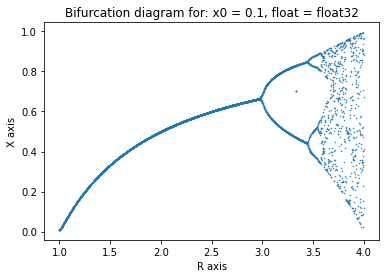

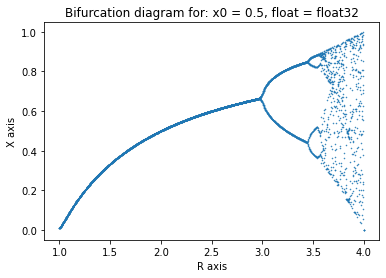

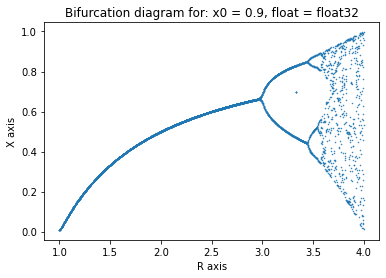

In [22]:
bifurcation_diagram(0.1)
bifurcation_diagram(0.5)
bifurcation_diagram(0.9)

Diagramy bifurkacyjne pokazały, że są niezależne od wartości początkowej x0 - są praktycznie identyczne

### 4.2. Trajektorie

In [23]:
def _get_table_for_trajectories(x0, r, iterations, float_type=float32):
    x, r = float_type(x0), float_type(r)
    result = [x]
    for _ in range(iterations):
        x = logistic_equation(x,r,float_type)
        result.append(x)

    return result

def trajectories(x0, r, iterations = 60):
    N = list(range(iterations+1))
    floats32 = _get_table_for_trajectories(x0, r, iterations)
    floats64 = _get_table_for_trajectories(x0, r, iterations, float_type=float64)

    plt.plot(N, floats32)
    plt.plot(N, floats64)
    plt.legend(['Float32', 'Float64'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xlabel('Iterations')
    plt.ylabel('X value')
    plt.title(f"Trajectories for x0 = {x0}, r = {r}")
    plt.show()

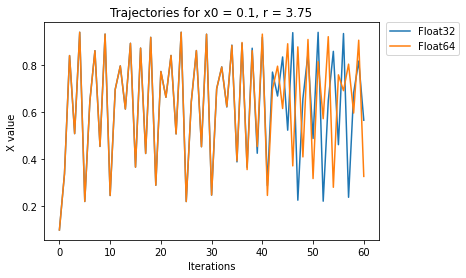

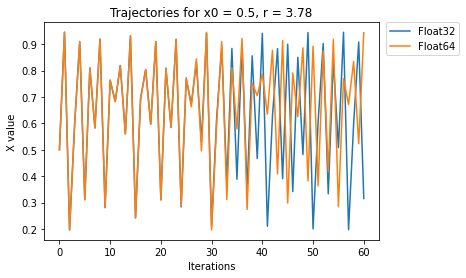

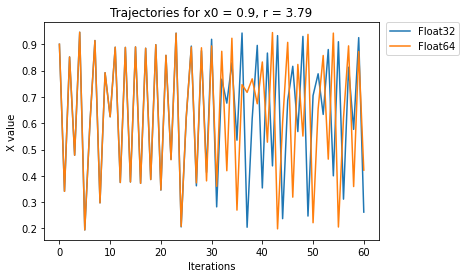

In [24]:
trajectories(0.1, 3.75)
trajectories(0.5, 3.78)
trajectories(0.9, 3.79)

Trajektorie stworzone zostały dla pierwszych 60 iteracji odwzorowania logistycznego. Początkowo nie ma widocznej róznicy pomiędzy obliczeniami na liczbach pojedyńczej i podwójnej precyzja. W pewnym momencie (zależne od x0 i r) znaczenie przybiera typ liczby zmiennoprzecinkowej, który został użyty - wyniki zaczynają się widocznie różnić.

### 4.3. Liczba iteracji potrzebna do osiągnięcia 0 przy r = 4

In [25]:
def get_iters_to_zero(x, r=float32(4), epsilon=10**(-7), max_iter=5000):
    result = 0
    while x > epsilon:
        if result > max_iter:
            return -1
        x = logistic_equation(x,r, float32)
        result+=1

    return result


def iterations_to_zero():
    x_range = arange(0.001, 0.999, 0.001, dtype=float32)

    not_coverages = 0
    X, I =list(),list()
    for x in x_range:
        i = get_iters_to_zero(x)
        if i != -1:
            X.append(x)
            I.append(i)
        else:
            not_coverages += 1


    plt.plot(X, I, marker='.', ls='', markersize=2)
    plt.xlabel('x0')
    plt.ylabel('Iterations')
    plt.title("Amount of iterations need to get 0 from x")

    plt.show()

    print(f"Number of points for which couldn't reach 0: {not_coverages}")
    print(f"All checked points: {len(x_range)}")

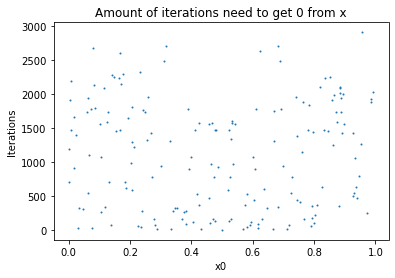

Number of points for which couldn't reach 0: 820
All checked points: 998


In [26]:
iterations_to_zero()

W celu sprawdzenia zbieżności do 0, ustawiony został epsilon równy 10<sup>-7</sup> oraz maksymalna liczba iteracji równa 5000. Początkowo program sprawdzał 10<sup>6</sup> iteracji, jednak nigdy nie doszło do przypadku w którym liczba iteracji była wieksza niż 3000, zatem została zmniejszona w celu przyspieszenia działania (nie pomogło użycie wątków a także biblioteki ray w celu optymalizacji czasu wykonania dla większej ilości iteracji).

Algorytm zajmuje aktulanie około 24 sekundy. Jest to spowodowane użyciem pojedyńczej precyzji, która znacząco wydłuża czas w porównaniu z podwójną precyzją. Warto zaznaczyć, że należało użyć pojedyńczej precyzji w każdej liczbie z iloczynu odwzorowania logistycznego - w przeciwnym razie otrzymywalibyśmy podwójną precyzję. Jest to związanie z dynamicznym zmienianiem typów w pythonie.

Niespodziewanie, ponieważ aż dla 82% punktów początkowych nie udało się otrzymać 0 (nie zostały one uwzględnione  na wykresie). Pozostałe punkty tworzą rozproszny rozkład - nie da się w żaden sposób ustalić, ile iteracji potrzeba do osiągnięcia 0 przy danym x<sub>0</sub>

Tak dużą liczbę punktów, które nie mogą dotrzeć do 0, można zmniejszyć poprzez zastosowanie podwójnej precyzji w obliczeniach.